In [93]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cubesphere as cs

In [94]:
datadir = "~/FV3/rundirs/C48/INPUT/"
ds = cs.open_FV3data(datadir,"fv_tracer.res",verbose=True,restart=True)

opening fv_tracer.res.tile1.nc, opening atmos_static.tile1.nc
opening fv_tracer.res.tile2.nc, opening atmos_static.tile2.nc
opening fv_tracer.res.tile3.nc, opening atmos_static.tile3.nc
opening fv_tracer.res.tile4.nc, opening atmos_static.tile4.nc
opening fv_tracer.res.tile5.nc, opening atmos_static.tile5.nc
opening fv_tracer.res.tile6.nc, opening atmos_static.tile6.nc


In [95]:
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, tile: 6, time: 1, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * pfull    (pfull) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) float64 1.0
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
Dimensions without coordinates: tile
Data variables:
    sphum    (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    liq_wat  (tile, time, pf

Must be careful when assigning data
- http://xarray.pydata.org/en/stable/indexing.html

In [120]:
da = ds["plume01"].copy() # don't modify original data
da["lon"] += 30.0

(-180, 0)

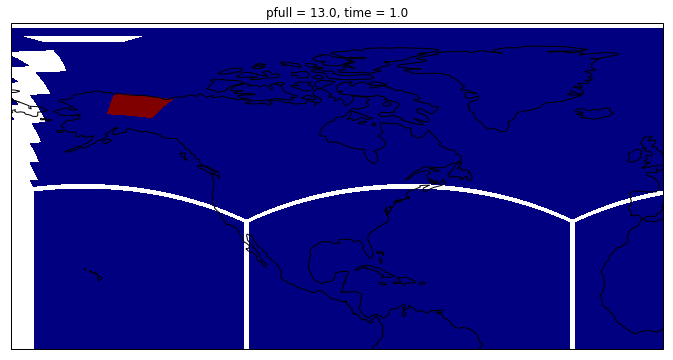

In [124]:
xedge,yedge=33,25
xsize,ysize = 3,3 #6,6

plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())

da[:] = 3e-6
da[dict(tile=2,pfull=-8,
        x=slice(xedge,xedge+xsize),
        y=slice(yedge,yedge+ysize))] = 1.0

da.isel(time=-1,pfull=-8).cs.plot_CSlayer(ax=ax,cbar=False)
ax.set_ylim([0,90])
ax.set_xlim([-180,0])

### Write back

In [147]:
ds_out = xr.open_dataset(datadir+"fv_tracer.res.tile3.nc")

In [148]:
ds_out

<xarray.Dataset>
Dimensions:  (Time: 1, xaxis_1: 48, yaxis_1: 48, zaxis_1: 20)
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * zaxis_1  (zaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * Time     (Time) float64 1.0
Data variables:
    sphum    (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    liq_wat  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    ice_wat  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    cld_amt  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume01  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume02  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume03  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume04  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
 

In [149]:
ds_out["plume01"][:] = da.isel(tile=2)

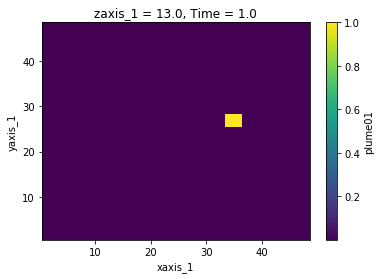

In [150]:
ds_out["plume01"].isel(Time=-1,zaxis_1=-8).plot()

In [154]:
ds_out.to_netcdf(datadir+"fv_tracer.res.tile3.nc")

OSError: Permission denied

### Examine results

In [152]:
ds_check = cs.open_FV3data(datadir,"fv_tracer.res",verbose=True,restart=True)

opening fv_tracer.res.tile1.nc, opening atmos_static.tile1.nc
opening fv_tracer.res.tile2.nc, opening atmos_static.tile2.nc
opening fv_tracer.res.tile3.nc, opening atmos_static.tile3.nc
opening fv_tracer.res.tile4.nc, opening atmos_static.tile4.nc
opening fv_tracer.res.tile5.nc, opening atmos_static.tile5.nc
opening fv_tracer.res.tile6.nc, opening atmos_static.tile6.nc


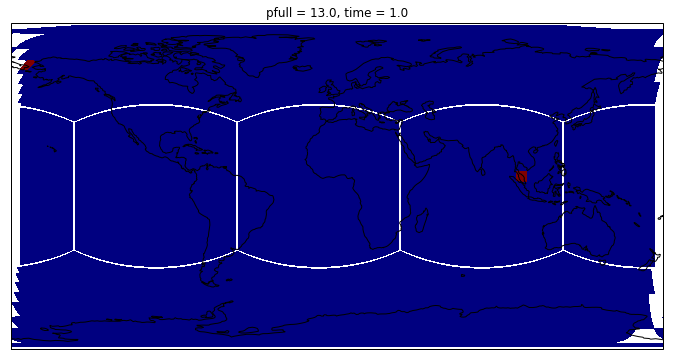

In [153]:
plt.figure(figsize=(12,6))
ds_check["plume01"].isel(time=-1,pfull=-8).cs.plot_CSlayer(cbar=False)